# Lecture 24 - Distance Metrics, Dimensionality Reduction, and Clustering

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt









#### Announcements:
* Quiz 6 graded - please check for errors!


#### Goals (likely continuing into tomorrow):
* [x] Think a bit about the geometric interpretation of vectors as points in high-dimensional space.
* [x] Know why dimensionality reduction can be useful
* [x] Know the intuition behind two dimensionality reduction techniques: PCA and random projections
* [x] Know how to compute the $L^p$ family of distance metrics, and understand the intuition for the special cases $L^0$, $L^1$, $L^2$, and $L^\infty$.
* [ ] Know why clustering can be useful
* [ ] Know the intuition behind two clustering techniques: K-means and DBSCAN

## Geometric Interpretation of Datapoints

* Our dataset $X$ is made of $n$ rows, each one being a $d$-dimensional vector.
* We call these datapoints because they can be thought of geometrically as **points** in $d$-dimensional space.
* This is simple to see when $d = 2$, and possible when $d = 3$. It gets hard to visualize after that.

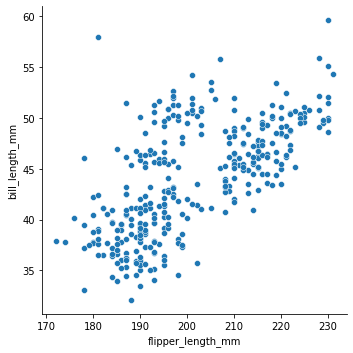

In [10]:
penguins = sns.load_dataset("penguins")
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

In [4]:
X = penguins[["flipper_length_mm", "bill_length_mm"]].to_numpy()
X.shape

(344, 2)

In [5]:
X

array([[181. ,  39.1],
       [186. ,  39.5],
       [195. ,  40.3],
       [  nan,   nan],
       [193. ,  36.7],
       [190. ,  39.3],
       [181. ,  38.9],
       [195. ,  39.2],
       [193. ,  34.1],
       [190. ,  42. ],
       [186. ,  37.8],
       [180. ,  37.8],
       [182. ,  41.1],
       [191. ,  38.6],
       [198. ,  34.6],
       [185. ,  36.6],
       [195. ,  38.7],
       [197. ,  42.5],
       [184. ,  34.4],
       [194. ,  46. ],
       [174. ,  37.8],
       [180. ,  37.7],
       [189. ,  35.9],
       [185. ,  38.2],
       [180. ,  38.8],
       [187. ,  35.3],
       [183. ,  40.6],
       [187. ,  40.5],
       [172. ,  37.9],
       [180. ,  40.5],
       [178. ,  39.5],
       [178. ,  37.2],
       [188. ,  39.5],
       [184. ,  40.9],
       [195. ,  36.4],
       [196. ,  39.2],
       [190. ,  38.8],
       [180. ,  42.2],
       [181. ,  37.6],
       [184. ,  39.8],
       [182. ,  36.5],
       [195. ,  40.8],
       [186. ,  36. ],
       [196

In [6]:
penguins["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [7]:
Y = penguins["species"].map({"Gentoo": 1, "Adelie": 2, "Chinstrap": 3}).to_numpy()
Y.shape

(344,)

In [8]:
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Thinking in High-Dimensional Space

This is hard, and our intuition tends to fall apart. **However**, real high-dimensional data often lies on a *lower-dimensional* **manifold**. 

What the heck does that mean?

If you sliced, rotated, projected, warped, etc. your space in just the right ways, you could represent the same information with fewer dimensions. The smallest possible number of dimensions possible to represent your data is called its *intrinsic dimensionality*.

## Unsupervised Learning

Goal: discover **structure** without any ground-truth labels.

What might we mean by **structure**?
  * Intrinsic dimensionality / the lower-dimensional manifold in which the data lives
  * Natural groupings based on proximity

## Dimensionality Reduction

Ways to get your $n$ feature vectors from $d$ dimensions to $d'$ dimensions (where $d' < d$).

Good for:
* Visualizing higher-dimensional data in 2D or 3D
* Finding (approximate) intrinsic dimensionality
* Speeding up your ML pipeline by reducing $d$

in all cases, these likely come at the expense of some accuracy.

Here are two common approches that are limited to **linear** notions of stretching, slicing, warping, etc:

### Principal Components Analysis

Reduces dimensionality by finding $d'$ new features (each is a linear combination of the old features) that **explain as much variance as possible**.

### Random Projections

Reduces dimensionality by multiplying $X_{n \times d}$ by a **random** matrix $P_{d \times d'}$, resulting in a reduced-dimensionality dataset $X'_{n \times d'}$.

Huh?

Somewhat surprisingly, this **works pretty well**. What's our metric for "works"? It preserves pairwise distances between points.

## Distance Metrics

A common family of distance metrics is the $L^p$ distance:

$$d_p(a, b) = \sqrt[p]{\sum_{i=1}^d |a_i - b_i|^p}$$

When $p = 2$, this is the Euclidean distance we're all used to, based on the Pythagorean theorem; in 2D, it reduces to: $$\sqrt{(b_x - a_x)^2 + (b_y - a_y)^2}$$

Different values of $p$ give different behavior: 
* For smaller $p$, we care less about how different the per-dimension differences are from each other.
* For larger $p$, we care more about how different the per-dimension differences are from each other.

A few examples of the "unit circle" under different $L^p$ distances:
![](lp_distances.png)

#### The curse of dimensionality, very briefly
It's worth noting that these distances become less and less useful as $d$ gets larger. There are a few ways to think about this, but the simplest is just that more dimensions means more opportunities for points to be far apart.